<a href="https://colab.research.google.com/github/kintanpitaloka/genz_minds/blob/main/genz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Scroll Effect: Screen Time vs Mental Health#

https://www.kaggle.com/datasets/abhishekdave9/digital-habits-vs-mental-health-dataset

**Overview**

The Digital Habits vs. Mental Health dataset is a synthetic dataset crafted to investigate the potential relationships between Gen Z's digital lifestyle—particularly screen time, social media engagement, and sleep—and their mental health indicators, such as stress levels and mood scores.
It contains 1,00,000 rows of data across 6 key variables that simulate real-world behavioral patterns.

This dataset is designed for use in exploratory data analysis (EDA), correlation analysis, feature engineering practice, machine learning modeling (regression/classification), and public health awareness applications.

It is especially useful for students, data scientists, and researchers interested in the intersection of technology usage and psychology in modern youth.

target = mood_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving digital_habits_vs_mental_health.csv to digital_habits_vs_mental_health.csv


In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [112]:
df = pd.read_csv('digital_habits_vs_mental_health.csv')

In [113]:
df.head()

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
0,10.3,2,5.3,4.4,10,5
1,6.5,5,3.5,6.2,8,8
2,9.1,4,2.8,6.6,7,8
3,6.5,3,2.5,6.5,7,9
4,2.1,3,1.2,7.8,2,10


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   screen_time_hours            100000 non-null  float64
 1   social_media_platforms_used  100000 non-null  int64  
 2   hours_on_TikTok              100000 non-null  float64
 3   sleep_hours                  100000 non-null  float64
 4   stress_level                 100000 non-null  int64  
 5   mood_score                   100000 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 4.6 MB


In [115]:
df.isnull().any()

,0
screen_time_hours,False
social_media_platforms_used,False
hours_on_TikTok,False
sleep_hours,False
stress_level,False
mood_score,False


In [116]:

df.describe()

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,6.003505,2.997820,2.401433,6.988489,6.179590,9.06076
std,1.987073,1.414452,1.079111,1.466330,2.045409,1.27847
min,1.000000,1.000000,0.200000,3.000000,1.000000,2.00000
25%,4.700000,2.000000,1.600000,6.000000,5.000000,8.00000
50%,6.000000,3.000000,2.300000,7.000000,6.000000,10.00000
75%,7.300000,4.000000,3.100000,8.000000,8.000000,10.00000
max,12.000000,5.000000,7.200000,10.000000,10.000000,10.00000


rata-rata:
* screen timenya = 6 jam
* sosmed yang digunakan = 2.99 jam
* tiktok = 2,4 jam
* sleep = 6 jam
* stress level = 6.1
* mood score = 9

-----
maximum:
* screentime = 12 jam
* sosmed platform = 5 jam
* tiktok = 7,2 jam
* sleep = 10 jam
* stress = 10
* mood = 10


##Exploratory Data Analysis##

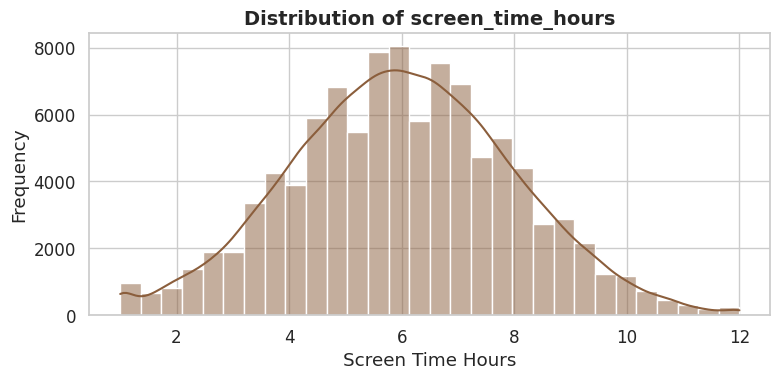

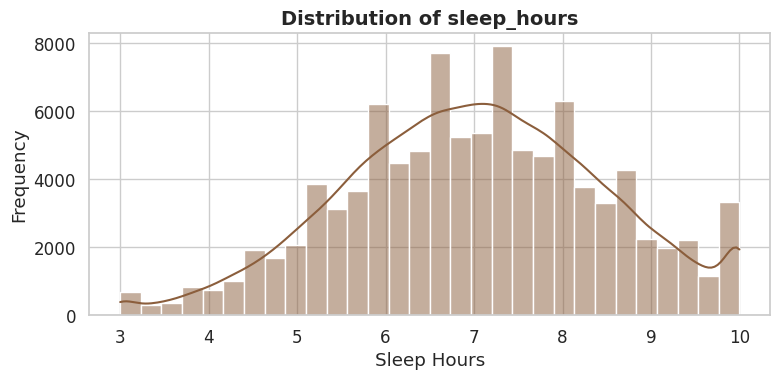

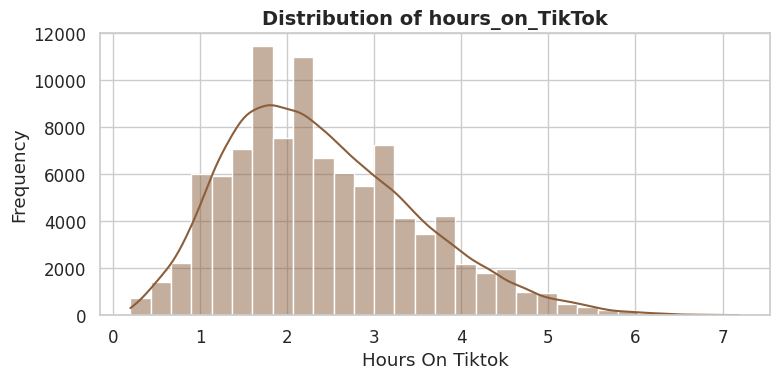

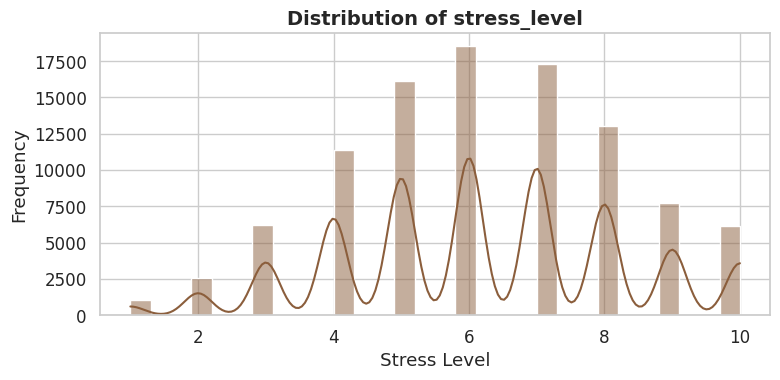

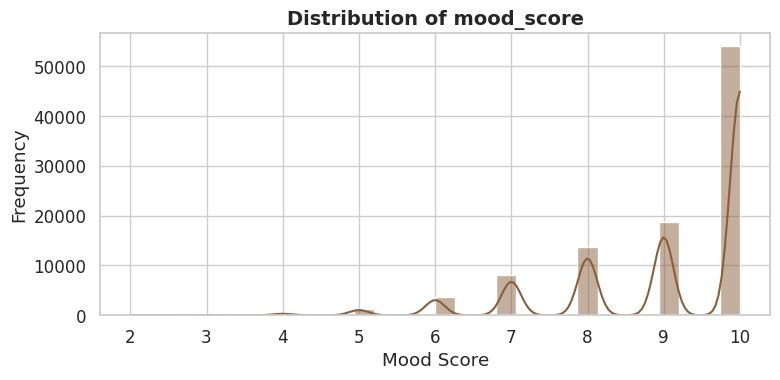

In [117]:

# Set seaborn style
sns.set(style='whitegrid', palette='pastel', font_scale=1.1)

colors = ["#8b5e3c"]
cmap = mcolors.LinearSegmentedColormap.from_list("pastel_brown", colors)

cols = ['screen_time_hours', 'sleep_hours', 'hours_on_TikTok', 'stress_level', 'mood_score']


for i, col in enumerate(cols):
    plt.figure(figsize=(8, 4))
    ax = sns.histplot(
        data=df,
        x=col,
        kde=True,
        bins=30,
        color=colors[i % len(colors)]
    )
    ax.set_title(f'Distribution of {col}', fontsize=14, weight='bold')
    ax.set_xlabel(col.replace('_', ' ').title())
    ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

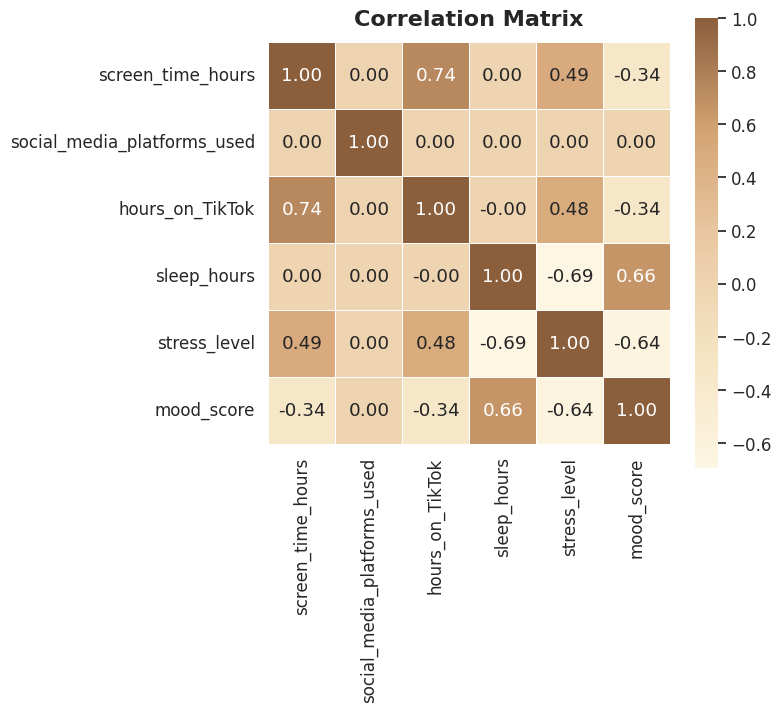

In [118]:

colors = sns.color_palette(["#fdf6e3", "#f5e4c3", "#eacaa5", "#d4a373", "#8b5e3c"])
cmap = mcolors.LinearSegmentedColormap.from_list("pastel_brown", colors)

sns.set(style="white", font_scale=1.1)


plt.figure(figsize=(8, 8))
corr_matrix = df.corr()

ax = sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
ax.set_title("Correlation Matrix", fontsize=16, weight='bold', pad=12)

plt.tight_layout()
plt.show()


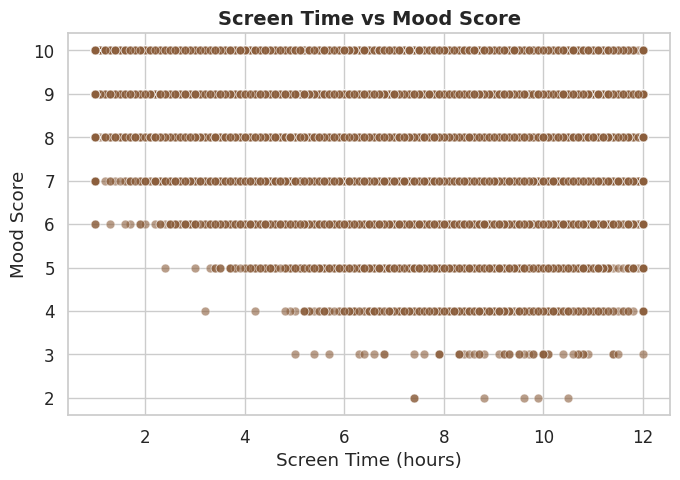

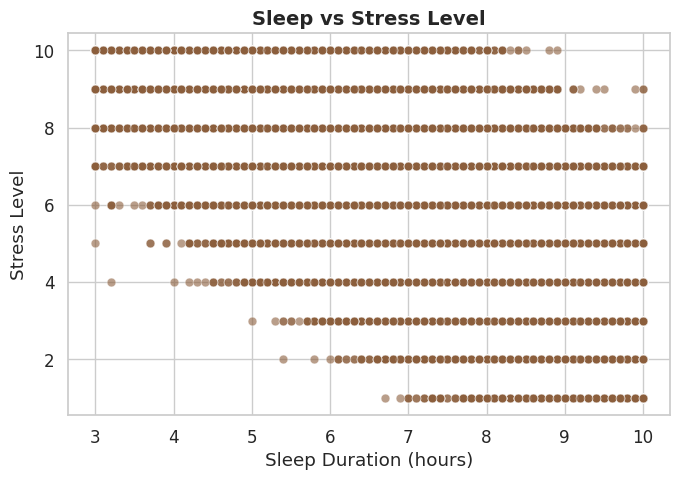

In [119]:

# Palet pastel-cream-coklat
colors = ["#f5e4c3", "#eacaa5", "#d4a373", "#8b5e3c"]

# Set seaborn style
sns.set(style="whitegrid", font_scale=1.1)

# Scatterplot: Screen Time vs Mood Score
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df,
    x='screen_time_hours',
    y='mood_score',
    color=colors[3],
    s=40,              # size of dots
    alpha=0.6          # transparency
)
plt.title("Screen Time vs Mood Score", fontsize=14, weight='bold')
plt.xlabel("Screen Time (hours)")
plt.ylabel("Mood Score")
plt.tight_layout()
plt.show()

# Scatterplot: Sleep vs Stress Level
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df,
    x='sleep_hours',
    y='stress_level',
    color=colors[3],   # deep brown
    s=40,
    alpha=0.6
)
plt.title("Sleep vs Stress Level", fontsize=14, weight='bold')
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Stress Level")
plt.tight_layout()
plt.show()

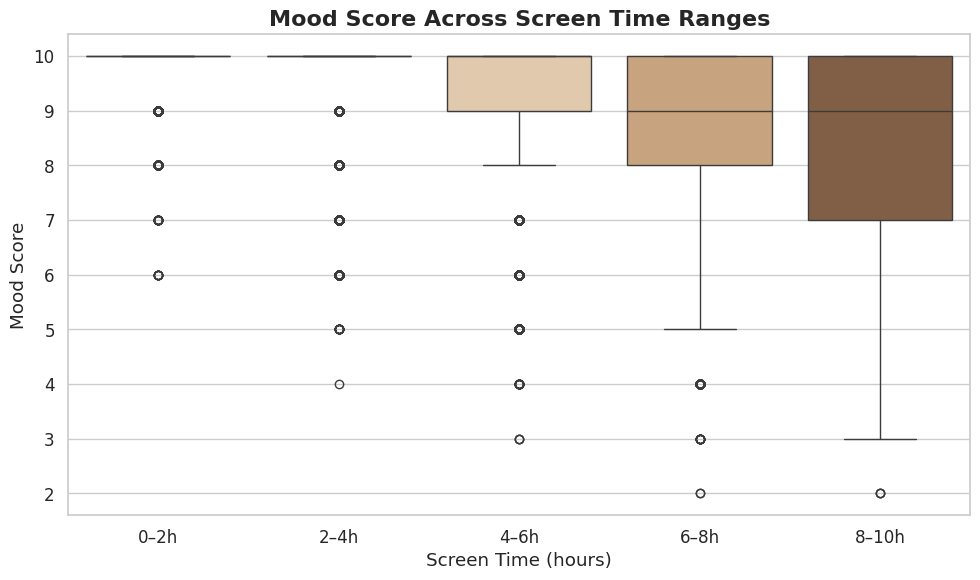

In [120]:


# Palet pastel-cream-coklat
colors = ["#fdf6e3", "#f5e4c3", "#eacaa5", "#d4a373", "#8b5e3c"]

# Set style
sns.set(style='whitegrid', font_scale=1.1)

# Binning screen time
df['screen_time_bins'] = pd.cut(df['screen_time_hours'],
                                 bins=[0,2,4,6,8,10],
                                 labels=["0–2h", "2–4h", "4–6h", "6–8h", "8–10h"])

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='screen_time_bins',
    y='mood_score',
    data=df,
    palette=colors[:5]  # gunakan palet pastel-cream-coklat
)

plt.title("Mood Score Across Screen Time Ranges", fontsize=16, weight='bold')
plt.xlabel("Screen Time (hours)")
plt.ylabel("Mood Score")
plt.tight_layout()
plt.show()

📌 Insight Utama dari Boxplot Screen Time vs Mood Score

---

```
✅ Mayoritas tetap mood tinggi (9–10)
🚨 Tapi semakin tinggi screen time (8–10 jam),
sebaran mood score makin lebar — bahkan sampai ke 3!
```

📊 Artinya apa?

Outwardly, mereka kelihatan fine — mayoritas mood masih tinggi

Tapi... risiko penurunan mood meningkat secara signifikan seiring screen time makin tinggi (ditunjukkan oleh ekor boxplot ke bawah: outliers + rentang IQR melebar)

*Interpretasi data analyst:*

"High screen time doesn’t always cause low mood — but it increases the risk of emotional dropouts. While many remain stable, the outliers get more extreme."

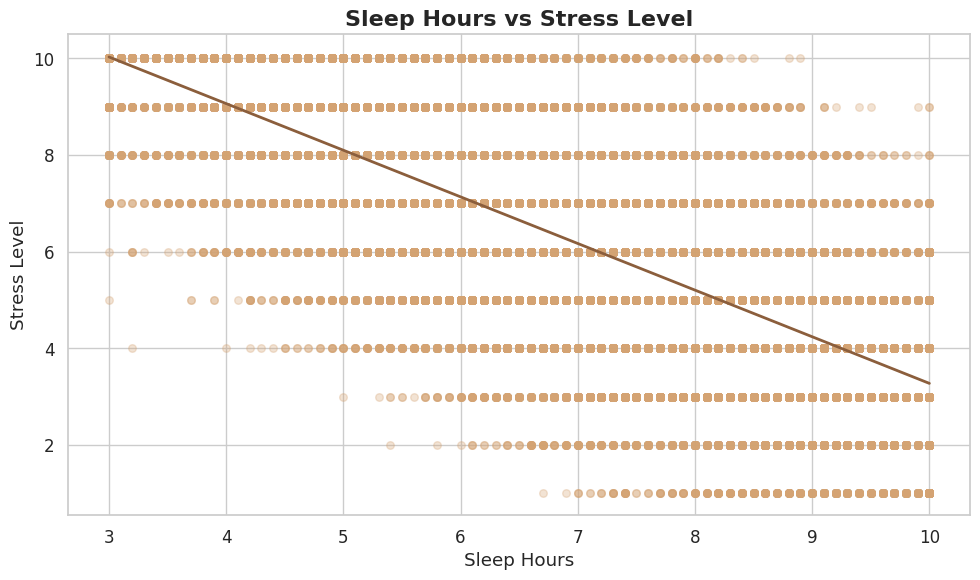

In [121]:

# Set style
sns.set(style='whitegrid', font_scale=1.1)

# Palet pastel–cream–coklat
point_color = "#d4a373"  # soft brown
line_color = "#8b5e3c"   # deep brown

# Plot regresi: Sleep vs Stress
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='sleep_hours',
    y='stress_level',
    scatter_kws={'alpha': 0.3, 'color': point_color, 's': 30},
    line_kws={'color': line_color, 'lw': 2}
)

plt.title("Sleep Hours vs Stress Level", fontsize=16, weight='bold')
plt.xlabel("Sleep Hours")
plt.ylabel("Stress Level")
plt.tight_layout()
plt.show()

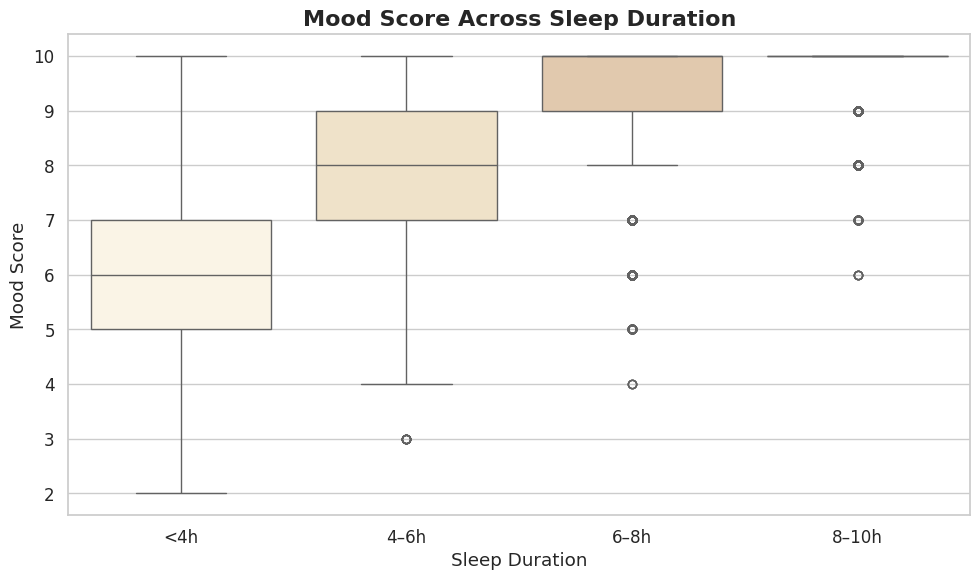

In [122]:


# Binning jam tidur
df['sleep_bins'] = pd.cut(df['sleep_hours'],
                          bins=[0, 4, 6, 8, 10],
                          labels=["<4h", "4–6h", "6–8h", "8–10h"])

# Palet pastel–cream–coklat
colors = ["#fdf6e3", "#f5e4c3", "#eacaa5", "#d4a373"]

# Set style seaborn
sns.set(style='whitegrid', font_scale=1.1)

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='sleep_bins',
    y='mood_score',
    data=df,
    palette=colors
)

plt.title("Mood Score Across Sleep Duration", fontsize=16, weight='bold')
plt.xlabel("Sleep Duration")
plt.ylabel("Mood Score")
plt.tight_layout()
plt.show()


In [123]:
def categorize_mood(score):
    if score <= 3:
        return "Low"
    elif score <= 7:
        return "Medium"
    else:
        return "High"

df['mood_category'] = df['mood_score'].apply(categorize_mood)
df['mood_category'] = df['mood_category'].astype('category')

/tmp/ipython-input-124-455061724.py:9: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.countplot(


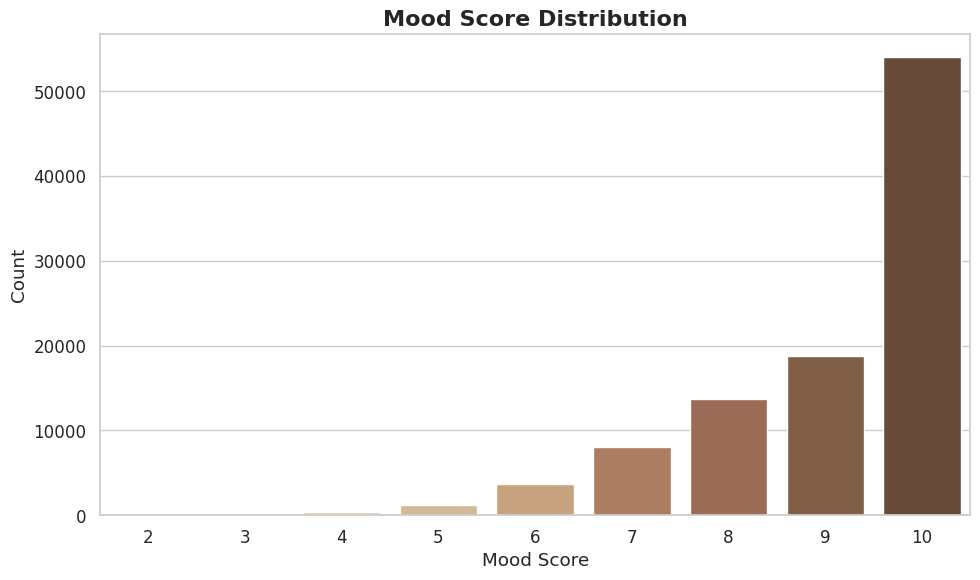

In [124]:
# Custom palette dari cream ke coklat tua
pastel_brown_palette = [
    "#fdf6e3", "#f5e4c3", "#eacaa5", "#ddb98c", "#d4a373",
    "#b97a56", "#a8664a", "#8b5e3c", "#704832", "#5a3a28"
]

# Plot countplot dengan palette baru
plt.figure(figsize=(10,6))
sns.countplot(
    x='mood_score',
    data=df,
    palette=pastel_brown_palette
)

plt.title("Mood Score Distribution", fontsize=16, weight='bold')
plt.xlabel("Mood Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [125]:
df.columns

Index(['screen_time_hours', 'social_media_platforms_used', 'hours_on_TikTok',
       'sleep_hours', 'stress_level', 'mood_score', 'screen_time_bins',
       'sleep_bins', 'mood_category'],
      dtype='object')

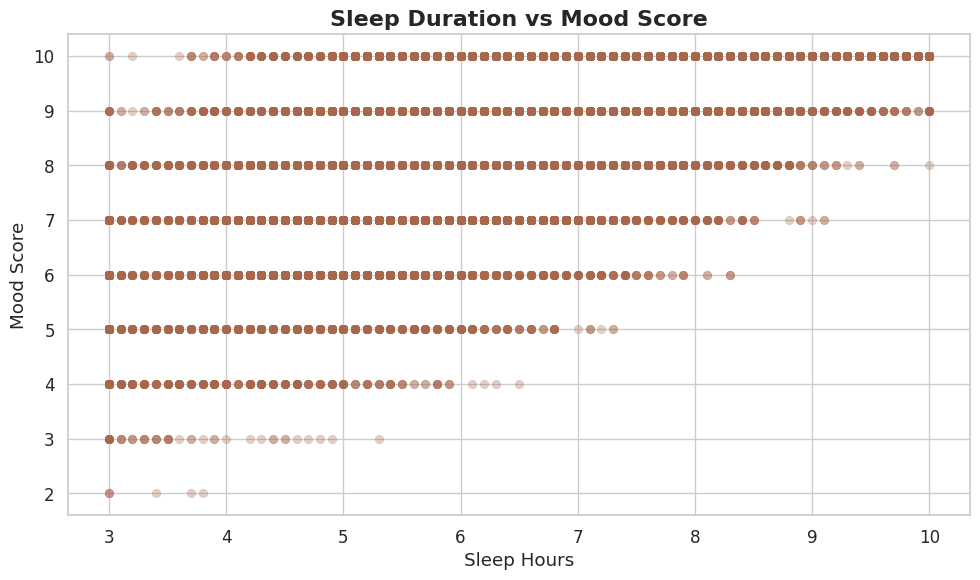

In [126]:
# Style seaborn + warna
sns.set(style='whitegrid', font_scale=1.1)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='sleep_hours',
    y='mood_score',
    data=df,
    color="#a8664a",   # deep brown tone
    alpha=0.3,
    edgecolor=None
)

plt.title("Sleep Duration vs Mood Score", fontsize=16, weight='bold')
plt.xlabel("Sleep Hours")
plt.ylabel("Mood Score")
plt.tight_layout()
plt.show()

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   screen_time_hours            100000 non-null  float64 
 1   social_media_platforms_used  100000 non-null  int64   
 2   hours_on_TikTok              100000 non-null  float64 
 3   sleep_hours                  100000 non-null  float64 
 4   stress_level                 100000 non-null  int64   
 5   mood_score                   100000 non-null  int64   
 6   screen_time_bins             97817 non-null   category
 7   sleep_bins                   100000 non-null  category
 8   mood_category                100000 non-null  category
dtypes: category(3), float64(3), int64(3)
memory usage: 4.9 MB


In [128]:
df[['screen_time_hours', 'hours_on_TikTok', 'sleep_hours']].describe()

,screen_time_hours,hours_on_TikTok,sleep_hours
count,100000.000000,100000.000000,100000.000000
mean,6.003505,2.401433,6.988489
std,1.987073,1.079111,1.466330
min,1.000000,0.200000,3.000000
25%,4.700000,1.600000,6.000000
50%,6.000000,2.300000,7.000000
75%,7.300000,3.100000,8.000000
max,12.000000,7.200000,10.000000


#Data Pre-Processing

In [129]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['mood_encoded'] = le.fit_transform(df['mood_category'])

X = df[['screen_time_hours', 'hours_on_TikTok', 'sleep_hours']]
y = df['mood_encoded']

In [130]:
df = df.drop(['screen_time_bins', 'sleep_bins'], axis=1)

In [131]:
df.head()

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score,mood_category,mood_encoded
0,10.3,2,5.3,4.4,10,5,Medium,2
1,6.5,5,3.5,6.2,8,8,High,0
2,9.1,4,2.8,6.6,7,8,High,0
3,6.5,3,2.5,6.5,7,9,High,0
4,2.1,3,1.2,7.8,2,10,High,0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   screen_time_hours            100000 non-null  float64 
 1   social_media_platforms_used  100000 non-null  int64   
 2   hours_on_TikTok              100000 non-null  float64 
 3   sleep_hours                  100000 non-null  float64 
 4   stress_level                 100000 non-null  int64   
 5   mood_score                   100000 non-null  int64   
 6   mood_category                100000 non-null  category
 7   mood_encoded                 100000 non-null  int64   
dtypes: category(1), float64(3), int64(4)
memory usage: 5.4 MB


#Modelling

In [133]:
X = df[['screen_time_hours', 'hours_on_TikTok', 'sleep_hours']]
y = df['mood_encoded']

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

        High       0.93      0.95      0.94     17360
         Low       0.00      0.00      0.00         7
      Medium       0.62      0.55      0.59      2633

    accuracy                           0.90     20000
   macro avg       0.52      0.50      0.51     20000
weighted avg       0.89      0.90      0.89     20000



In [137]:
df['mood_category'].value_counts()

,count
mood_category,
High,86590
Medium,13354
Low,56


In [138]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [139]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", X_train.shape, y_train.value_counts().to_dict())
print("After SMOTE:", X_resampled.shape, pd.Series(y_resampled).value_counts().to_dict())


Before SMOTE: (80000, 3) {0: 69230, 2: 10721, 1: 49}
After SMOTE: (207690, 3) {0: 69230, 2: 69230, 1: 69230}


In [140]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [141]:
y_pred = model.predict(X_test)

In [142]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

        High       0.94      0.94      0.94     17360
         Low       0.07      0.29      0.11         7
      Medium       0.59      0.59      0.59      2633

    accuracy                           0.89     20000
   macro avg       0.53      0.60      0.55     20000
weighted avg       0.89      0.89      0.89     20000



In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "DecisionTree": DecisionTreeClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

import pandas as pd
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1-Score', ascending=False)
results_df.reset_index(drop=True, inplace=True)
results_df


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:59:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Accuracy,Precision,Recall,F1-Score
0,RandomForest,0.89110,0.891926,0.89110,0.891492
1,XGBoost,0.88155,0.908137,0.88155,0.891217
2,DecisionTree,0.88115,0.878534,0.88115,0.879676
3,GradientBoosting,0.85670,0.909969,0.85670,0.874486
4,LogisticRegression,0.84310,0.908465,0.84310,0.865475
5,KNN,0.83505,0.890140,0.83505,0.853760
6,SVC,0.81560,0.907358,0.81560,0.844735
7,AdaBoost,0.81025,0.893241,0.81025,0.837479


✨ Insight Singkat & Profesional
"Among 8 classification models tested after class balancing with SMOTE, the Random Forest classifier achieved the highest overall F1-score (0.891), indicating strong and balanced predictive performance across all mood classes. XGBoost closely followed with a similar F1-score, slightly outperforming Random Forest in precision, while Decision Tree offered a good balance between simplicity and performance. Traditional models like Logistic Regression and KNN performed decently, but tree-based models generally offered better handling of the multiclass imbalanced data scenario."

In [144]:
model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [145]:
new_data = [[7.0, 3.2, 6.0]]  # urutan: screen_time_hours, hours_on_TikTok, sleep_hours


In [146]:
prediction_encoded = model.predict(new_data)
prediction_label = le.inverse_transform(prediction_encoded)
print("Predicted Mood:", prediction_label[0])


Predicted Mood: High


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [147]:
def predict_mood(screen_time, tiktok_time, sleep_time):
    new_data = [[screen_time, tiktok_time, sleep_time]]
    encoded = model.predict(new_data)
    return le.inverse_transform(encoded)[0]

In [148]:
predict_mood(8.0, 2.5, 7.0)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'High'

In [149]:
pip install joblib

In [150]:
import joblib

# Simpan model
joblib.dump(model, 'mood_predictor_model.pkl')

# Simpan label encoder juga (biar bisa decode prediksi)
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']

In [153]:
# Load model
model = joblib.load('mood_predictor_model.pkl')

# Load label encoder
le = joblib.load('label_encoder.pkl')

# Prediksi
new_data = [[6.5, 2.8, 7.0]]  # screen_time, tiktok, sleep
prediction = model.predict(new_data)
print("The Mood is:", le.inverse_transform(prediction)[0])


The Mood is: High


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
